In [40]:
# Block 0: Documentation

print('Code to open a netCDF4 file containing Level 3 data, read global file metadata & metadata for variables, and plot data on a map using different map projections and settings to make a beautiful image. \n')
print('Written November 21, 2022 using Python v3.9.12, Xarray v0.20.1, Matplotlib v3.5.1, and Cartopy v0.18.0\n')
print('Author: Dr. Amy Huff (IMSG at NOAA/NESDIS/STAR), amy.huff@noaa.gov\n')
print('**Please acknowledge the NOAA/NESDIS/STAR Aerosols and Atmospheric Composition Science Team if using any of this code in your work/research!**')

Code to open a netCDF4 file containing Level 3 data, read global file metadata & metadata for variables, and plot data on a map using different map projections and settings to make a beautiful image. 

Written November 21, 2022 using Python v3.9.12, Xarray v0.20.1, Matplotlib v3.5.1, and Cartopy v0.18.0

Author: Dr. Amy Huff (IMSG at NOAA/NESDIS/STAR), amy.huff@noaa.gov

**Please acknowledge the NOAA/NESDIS/STAR Aerosols and Atmospheric Composition Science Team if using any of this code in your work/research!**


In [41]:
# Block 1: Import Python packages

# Library for working with labelled multi-dimensional arrays
import xarray as xr

# Library to perform array operations
import numpy as np

# Library to make plots
import matplotlib as mpl
from matplotlib import pyplot as plt

# Library to create maps
from cartopy import crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

# Module for manipulating dates and times
import datetime

# Module to set filesystem paths appropriate for user's operating system
from pathlib import Path

In [42]:
# Block 2: Set directory path and file name for satellite data file using pathlib
# pathlib module documentation: https://docs.python.org/3/library/pathlib.html#module-pathlib

# Set directory path (where file is located) as current working directory ("cwd")
# Make sure satellite data file is in the cwd!
# To set path for entered directory_name (as a string): Path('directory_name')
directory_path = Path.cwd()

# File name of satellite data file
file_name = 'viirs_eps_npp_aod_0.100_deg_20220911.nc'

# Set path for file using pathlib syntax
file_id = directory_path / file_name

In [43]:
# Block 3: Open file (dataset, abbreviated "ds") using xarray & print global file metadata

ds = xr.open_dataset(file_id)

ds

<xarray.Dataset>
Dimensions:       (lon: 3600, lat: 1800)
Coordinates:
  * lon           (lon) float32 -179.9 -179.8 -179.8 ... 179.8 179.9 179.9
  * lat           (lat) float32 -89.95 -89.85 -89.75 ... 89.75 89.85 89.95
Data variables:
    AOD550        (lat, lon) float32 ...
    AE            (lat, lon) float32 ...
    AOD550_count  (lat, lon) uint16 ...
    AE_count      (lat, lon) uint16 ...
Attributes:
    dataset_name:        viirs_eps_npp_aod_0.100_deg_20220911.nc
    title:               NOAA Enterprise L3 Aerosol Optical Depth
    spatial_resolution:   0.10 degree
    processing_level:    National Oceanic and Atmospheric Administration (NOA...
    Conventions:         CF-1.6
    instrument_name:     VIIRS
    satellite_name:      Suomi NPP
    source:              VIIRS EPS high quality AOD

In [44]:
# Block 4a: Print aerosol optical depth (AOD) at 550nm data array as a NumPy array

ds.AOD550.values

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [45]:
# Block 4b: Print maximum and minimum values in AOD data array, ignorning any NaNs, using NumPy

print(np.nanmax(ds.AOD550.values))
print(np.nanmin(ds.AOD550.values))

4.9863234
-0.049990635


In [46]:
# Block 5a: Print latitude data array as a NumPy array

ds.lat.values

array([-89.95    , -89.85    , -89.75    , ...,  89.75    ,  89.850006,
        89.95001 ], dtype=float32)

In [47]:
# Block 5b: Print longitude data array as a NumPy array

ds.lon.values

array([-179.95   , -179.84999, -179.75   , ...,  179.75002,  179.85002,
        179.95   ], dtype=float32)

In [48]:
# Block 6a: Make a quick plot of aerosol optical depth (AOD) at 550nm
# Simplest possible plot (default settings)

ds.AOD550.plot()

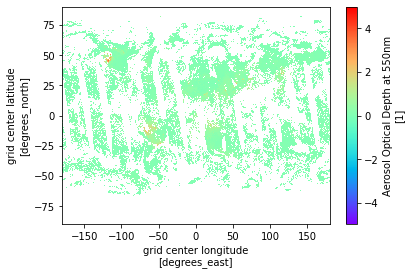

In [49]:
# Block 6b: Make a quick plot of aerosol optical depth (AOD) at 550nm
# Use a different colormap to increase visibility of AOD data
# List of Matplotlib colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html
# Pick a "sequential" colormap ("used for representing information that has ordering")
# Adding "_r" to the end of any colormap name reverses it (e.g., "plasma_r")

ds.AOD550.plot(cmap='rainbow')

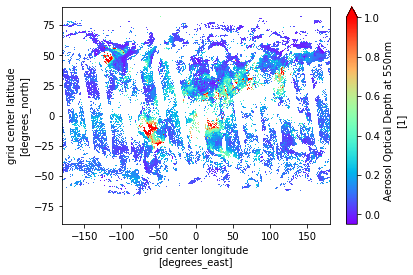

In [50]:
# Block 6c: Make a quick plot of aerosol optical depth (AOD) at 550nm
# Set plotted AOD data range as [-0.05, 1] to emphsize areas of AOD > 1 (thick aerosols)

ds.AOD550.plot(cmap='rainbow', vmin=-0.05, vmax=1)

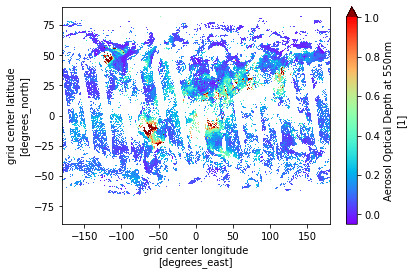

In [51]:
# Block 6d: Make a quick plot of aerosol optical depth (AOD) at 550nm
# Set colormap with unique color for data > vmax to emphasize AOD > 1
# List of Matplotlib colors: https://matplotlib.org/stable/gallery/color/named_colors.html

cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')
ds.AOD550.plot(cmap=cmap, vmin=-0.05, vmax=1)

In [ ]:
# Block 6e: Make a quick plot of aerosol optical depth (AOD) at 550nm
# SET YOUR OWN COLORMAP AND COLOR FOR AOD > 1

cmap = plt.get_cmap('').with_extremes(over='')
ds.AOD550.plot(cmap=cmap, vmin=-0.05, vmax=1)

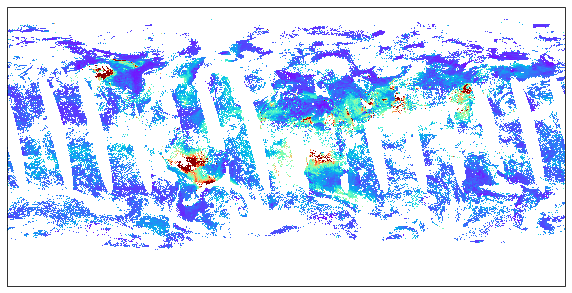

In [52]:
# Block 7a: Plot aerosol optical depth (AOD) at 550 nm on a map projection using Matplotlib & Cartopy
# List of Cartopy's map projections: https://scitools.org.uk/cartopy/docs/latest/reference/projections.html

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# Set map projection: Plate Carree, equidistant cylindrical (equirectangular) projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Set colormap with unique color for data > vmax
cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

# Create pseudo-color plot of AOD data
# The "transform=ccrs.PlateCarree()" argument tells Cartopy the AOD data are in geographic coordinates (lat/lon)
plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree())

# Show plot
plt.show()

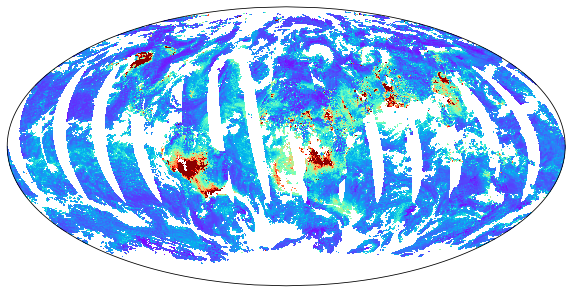

In [53]:
# Block 7b: Plot aerosol optical depth (AOD) at 550 nm on a map projection using Matplotlib & Cartopy
# List of Cartopy's map projections: https://scitools.org.uk/cartopy/docs/latest/reference/projections.html

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# Set map projection: Mollweide, pseudocylindrical equal area projection
ax = plt.axes(projection=ccrs.Mollweide())

# Set colormap with unique color for data > vmax
cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

# Create pseudo-color plot of AOD data
# The "transform=ccrs.PlateCarree()" argument tells Cartopy the AOD data are in geographic coordinates (lat/lon)
plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree())

# Show plot
plt.show()

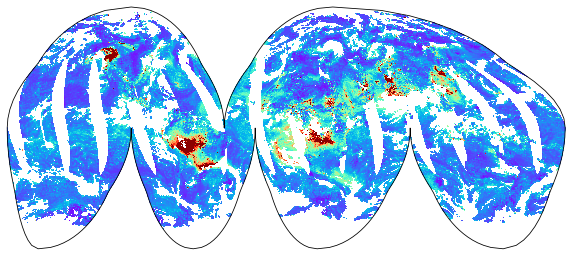

In [54]:
# Block 7c: Plot aerosol optical depth (AOD) at 550 nm on a map projection using Matplotlib & Cartopy
# List of Cartopy's map projections: https://scitools.org.uk/cartopy/docs/latest/reference/projections.html

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# Set map projection: Interrupted Goode Homolosine, composite equal area projection
ax = plt.axes(projection=ccrs.InterruptedGoodeHomolosine())

# Set colormap with unique color for data > vmax
cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

# Create pseudo-color plot of AOD data
# The "transform=ccrs.PlateCarree()" argument tells Cartopy the AOD data are in geographic coordinates (lat/lon)
plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree())

# Show plot
plt.show()

In [ ]:
# Block 7d: Plot aerosol optical depth (AOD) at 550 nm on a map projection using Matplotlib & Cartopy
# SET YOUR OWN COLORMAP AND COLOR FOR AOD > 1
# SET YOUR OWN MAP PROJECTION

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# SET MAP PROJECTION
ax = plt.axes(projection=)

# SET COLORMAP WITH UNIQUE COLOR FOR DATA > VMAX
cmap = plt.get_cmap('').with_extremes(over='')

# Create pseudo-color plot of AOD data
# The "transform=ccrs.PlateCarree()" argument tells Cartopy the AOD data are in geographic coordinates (lat/lon)
plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree())

# Show plot
plt.show()

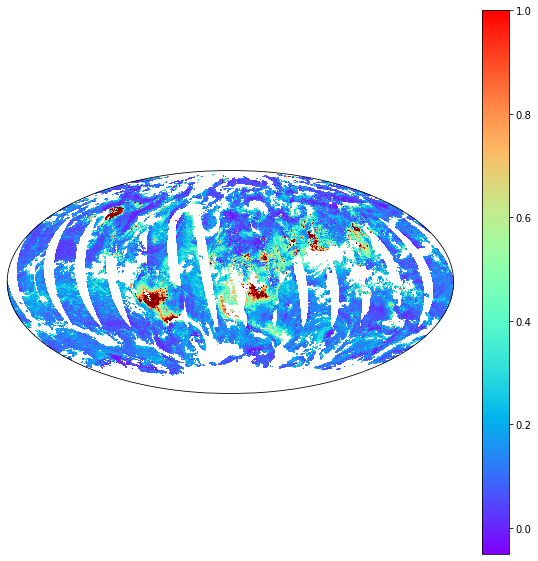

In [55]:
# Block 8a: Add a colorbar to map of aerosol optical depth (AOD) at 550 nm
# Simplest possible colorbar (default settings)

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# Set map projection: Mollweide, pseudocylindrical equal area projection
ax = plt.axes(projection=ccrs.Mollweide())

# Set colormap with unique color for data > vmax
cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

# Create pseudo-color plot of AOD data
# The "transform=ccrs.PlateCarree()" argument tells Cartopy the AOD data are in geographic coordinates (lat/lon)
plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree())

# Add colorbar
plt.colorbar(plot)

# Show plot
plt.show()

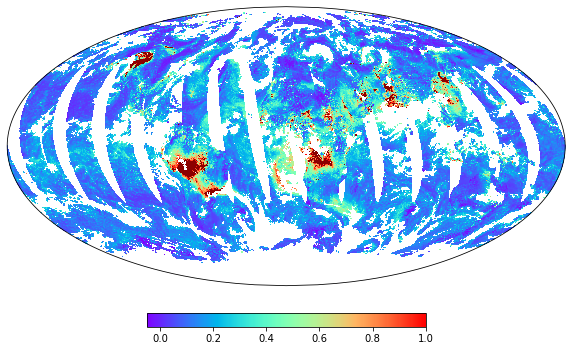

In [56]:
# Block 8b: Add a colorbar to map of aerosol optical depth (AOD) at 550 nm
# Change size and position of colorbar
# Matplotlib colorbar settings: https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.colorbar

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# Set map projection: Mollweide, pseudocylindrical equal area projection
ax = plt.axes(projection=ccrs.Mollweide())

# Set colormap with unique color for data > vmax
cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

# Create pseudo-color plot of AOD data
# The "transform=ccrs.PlateCarree()" argument tells Cartopy the AOD data are in geographic coordinates (lat/lon)
plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree())

# Add colorbar
cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.05, shrink=0.5)

# Show plot
plt.show()

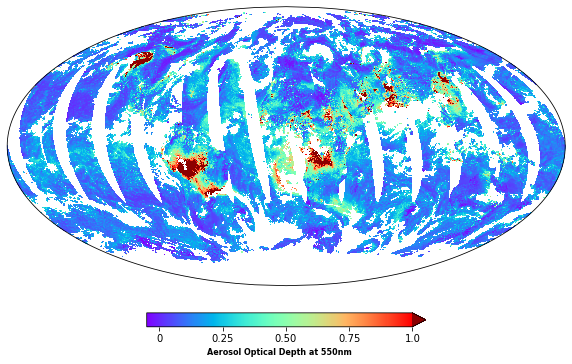

In [57]:
# Block 8c: Add a colorbar to map of aerosol optical depth (AOD) at 550 nm
# Set tick intervals & labels and add title to colorbar
# Matplotlib colorbar settings: https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.colorbar
# Matplotlib text settings: https://matplotlib.org/stable/tutorials/text/text_props.html

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# Set map projection: Mollweide, pseudocylindrical equal area projection
ax = plt.axes(projection=ccrs.Mollweide())

# Set colormap with unique color for data > vmax
cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

# Create pseudo-color plot of AOD data
# The "transform=ccrs.PlateCarree()" argument tells Cartopy the AOD data are in geographic coordinates (lat/lon)
plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree())

# Add colorbar
cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.05, shrink=0.5, ticks=[0, 0.25, 0.5, 0.75, 1], extend='max')
cb.set_label(label='Aerosol Optical Depth at 550nm', size=8, weight='bold')
cb.ax.set_xticklabels(['0', '0.25', '0.50', '0.75', '1.0'])

# Show plot
plt.show()

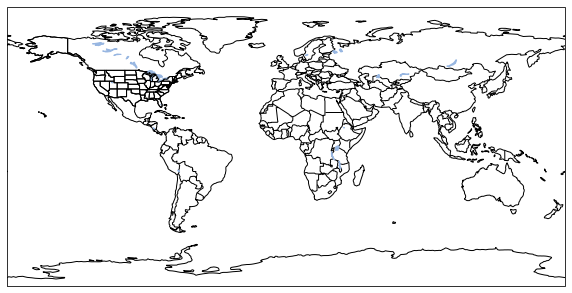

In [58]:
# Block 9a: Add coastlines/borders/shading to map
# Leave out AOD for now to show map clearly
# Using Cartopy Features interface: https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html
# Add basic coastlines & borders

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# Set map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add simple coastlines & borders (1:110m coarse resolution, lw=1)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.STATES)

# Show plot
plt.show()

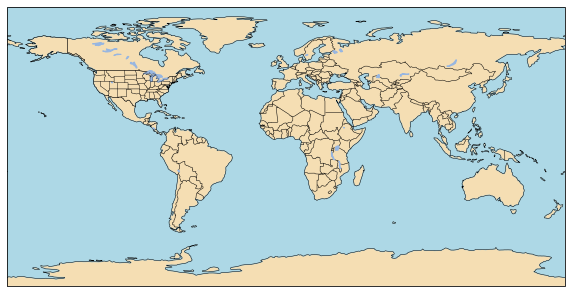

In [59]:
# Block 9b: Add coastlines/borders/shading to map
# Leave out AOD for now to show map clearly
# Using the Cartopy Features interface: https://scitools.org.uk/cartopy/docs/latest/matplotlib/feature_interface.html
# Add shading for land & ocean polygons; change line width ("lw") of coastlines & borders

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# Set map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add simple coastlines and borders and shading (1:110m coarse resolution)
ax.add_feature(cfeature.COASTLINE, lw=0.5)
ax.add_feature(cfeature.BORDERS, lw=0.5)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.STATES, lw=0.25)
ax.add_feature(cfeature.LAND, color='wheat')
ax.add_feature(cfeature.OCEAN, color='lightblue')

# Show plot
plt.show()

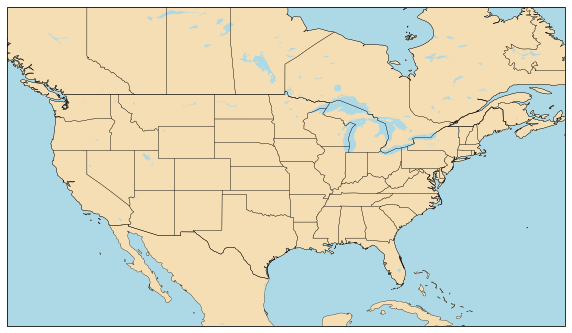

In [60]:
# Block 9c: Add coastlines/borders/shading to map
# Leave out AOD for now to show map clearly
# Using Natural Earth shapefiles: https://www.naturalearthdata.com/downloads/
# Change resolution of coastlines & borders (make finer resolution)

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# Set map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Zoom into North America to see higher resolution features
# Bounding box = [western longitude, eastern longitude, southern latitude, northern latitude]
ax.set_extent([-130, -60, 20, 60], crs=ccrs.PlateCarree())

# Add detailed coastlines & borders and shading
# Options for feature resolution: '110m' (coarse), '50m' (medium), '10m' (fine)
# Add detailed borders and coastlines
# "zorder" argument sets order for plotting layers (larger zorder plots over smaller zorder); default zorder=1.5 
ax.coastlines(resolution='50m', lw=0.5)
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale='50m'), lw=0.25, facecolor='none', edgecolor='black', zorder=2)
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', name='lakes', scale='50m'), facecolor='lightblue', edgecolor='none', zorder=2)
ax.add_feature(cfeature.NaturalEarthFeature(category='cultural', name='admin_1_states_provinces', scale='50m'), lw=0.25, facecolor='none', edgecolor='black', zorder=2)
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', name='ocean', scale='50m'), facecolor='lightblue')
ax.add_feature(cfeature.NaturalEarthFeature(category='physical', name='land', scale='50m'), facecolor='wheat')

# Show plot
plt.show()

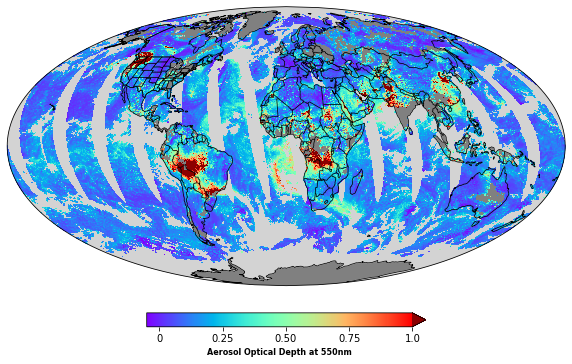

In [61]:
# Block 9d: Add coastlines/borders/shading to global map of aerosol optical depth (AOD) at 550 nm
# Change land/ocean/lakes shading to neutral colors to provide contrast against AOD data

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# Set map projection
ax = plt.axes(projection=ccrs.Mollweide())

# Add simple coastlines and borders and shading (1:110m coarse resolution)
# "zorder" argument sets order for plotting layers (larger zorder plots over smaller zorder); default zorder=1.5 
ax.add_feature(cfeature.COASTLINE, lw=0.75, zorder=3)
ax.add_feature(cfeature.BORDERS, lw=0.75, zorder=3)
ax.add_feature(cfeature.LAKES, color='lightgrey')
ax.add_feature(cfeature.STATES, lw=0.5, zorder=3)
ax.add_feature(cfeature.LAND, color='grey')
ax.add_feature(cfeature.OCEAN, color='lightgrey')

# Set colormap with unique color for data > vmax
cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

# Create pseudo-color plot of AOD data
# The "transform=ccrs.PlateCarree()" argument tells Cartopy the AOD data are in geographic coordinates (lat/lon)
# The "zorder=2" argument plots AOD data under coastlines/borders & over land/ocean/lakes polygons
plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree(), zorder=2)

# Add colorbar
cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.05, shrink=0.5, ticks=[0, 0.25, 0.5, 0.75, 1], extend='max')
cb.set_label(label='Aerosol Optical Depth at 550nm', size=8, weight='bold')
cb.ax.set_xticklabels(['0', '0.25', '0.50', '0.75', '1.0'])

# Show plot
plt.show()

In [62]:
# Block 10a: Add latitude/longitude gridlines & labels
# Leave out AOD for now to show map clearly
# Cartopy gridlines settings: https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html#cartopy.mpl.geoaxes.GeoAxes.gridlines
# Cartopy gridlines tutorial: https://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# Set map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add simple coastlines & borders (1:110m coarse resolution, lw=1)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.STATES)

# Add simple latitude/longitude gridlines & labels using Cartopy (default settings)
gl=ax.gridlines(draw_labels=True)
gl.xformatter=LongitudeFormatter()
gl.yformatter=LatitudeFormatter()

# Show plot
plt.show()

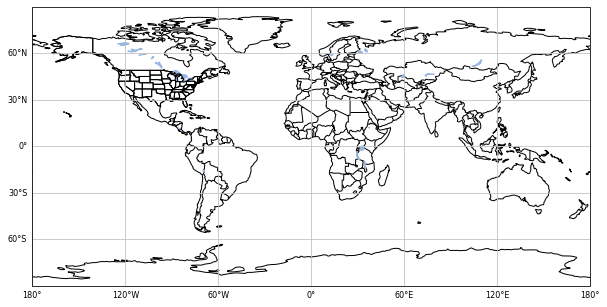

In [63]:
# Block 10b: Add latitude/longitude gridlines & labels
# Leave out AOD for now to show map clearly
# Cartopy gridlines settings: https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html#cartopy.mpl.geoaxes.GeoAxes.gridlines
# Cartopy gridlines tutorial: https://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# Set map projection
ax = plt.axes(projection=ccrs.PlateCarree())

# Add simple coastlines & borders (1:110m coarse resolution, lw=1)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.STATES)

# Add customized latitude/longitude gridlines & labels using Cartopy
# Select a gridline color that will contrast with plotted data but not be distracting
gl=ax.gridlines(draw_labels=True, lw=0.25, color='silver')
gl.xformatter=LongitudeFormatter()
gl.yformatter=LatitudeFormatter()
gl.right_labels=None
gl.top_labels=None
gl.ypadding=5
gl.xpadding=5
gl.xlabel_style={'size': 8}
gl.ylabel_style={'size': 8}

# Show plot
plt.show()

In [ ]:
# Block 10c: Add latitude/longitude gridlines & labels
# Leave out AOD for now to show map clearly
# Cartopy gridlines settings: https://scitools.org.uk/cartopy/docs/latest/reference/generated/cartopy.mpl.geoaxes.GeoAxes.html#cartopy.mpl.geoaxes.GeoAxes.gridlines
# Cartopy gridlines tutorial: https://scitools.org.uk/cartopy/docs/latest/matplotlib/gridliner.html
# SET YOUR OWN MAP PROJECTION & GRIDLINES FORMATTING

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# SET MAP PROJECTION
ax = plt.axes(projection=)

# Add simple coastlines & borders (1:110m coarse resolution, lw=1)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.STATES)

# ADD CUSTOMIZED LATITUDE/LONGITUDE GRIDLINES & LABELS USING CARTOPY
gl=ax.gridlines(draw_labels=True)
gl.xformatter=LongitudeFormatter()
gl.yformatter=LatitudeFormatter()

# Show plot
plt.show()

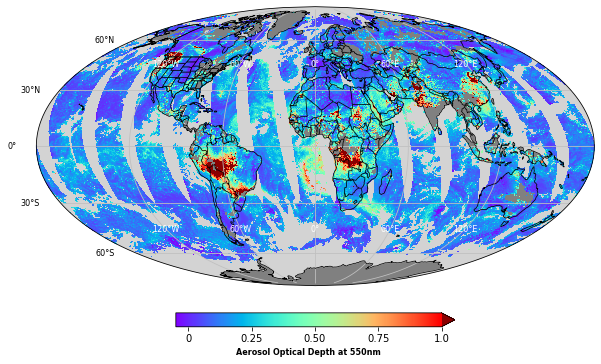

In [64]:
# Block 10d: Add latitude/longitude gridlines & labels to global map of aerosol optical depth (AOD) at 550 nm

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# Set map projection
ax = plt.axes(projection=ccrs.Mollweide())

# Add simple coastlines & borders (1:110m coarse resolution)
# "zorder" argument sets order for plotting layers (larger zorder plots over smaller zorder); default zorder=1.5 
ax.add_feature(cfeature.COASTLINE, lw=0.75, zorder=3)
ax.add_feature(cfeature.BORDERS, lw=0.75, zorder=3)
ax.add_feature(cfeature.LAKES, color='lightgrey')
ax.add_feature(cfeature.STATES, lw=0.5, zorder=3)
ax.add_feature(cfeature.LAND, color='grey')
ax.add_feature(cfeature.OCEAN, color='lightgrey')

# Add customized latitude/longitude gridlines & labels using Cartopy
gl=ax.gridlines(draw_labels=True, lw=0.25, color='silver')
gl.xformatter=LongitudeFormatter()
gl.yformatter=LatitudeFormatter()
gl.right_labels=None
gl.rotate_labels=None
gl.ypadding=20
gl.xlabel_style={'size': 8, 'color': 'white'}
gl.ylabel_style={'size': 8}

# Set colormap with unique color for data > vmax
cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

# Create pseudo-color plot of AOD data
# The "transform=ccrs.PlateCarree()" argument tells Cartopy the AOD data are in geographic coordinates (lat/lon)
# The "zorder=2" argument plots AOD data under coastlines/borders & over land/ocean/lakes polygons
plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree(), zorder=2)

# Add colorbar
cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.05, shrink=0.5, ticks=[0, 0.25, 0.5, 0.75, 1], extend='max')
cb.set_label(label='Aerosol Optical Depth at 550nm', size=8, weight='bold')
cb.ax.set_xticklabels(['0', '0.25', '0.50', '0.75', '1.0'])

# Show plot
plt.show()

In [65]:
# Block 11a: Add a plot title to global map of aerosol optical depth (AOD) at 550 nm
# Add a manual title using default Matplotlib settings

image_title = 'SNPP/VIIRS Aerosol Optical Depth at 550nm'

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# Set map projection
ax = plt.axes(projection=ccrs.Mollweide())

# Add simple coastlines & borders (1:110m coarse resolution)
# "zorder" argument sets order for plotting layers (larger zorder plots over smaller zorder); default zorder=1.5 
ax.add_feature(cfeature.COASTLINE, lw=0.75, zorder=3)
ax.add_feature(cfeature.BORDERS, lw=0.75, zorder=3)
ax.add_feature(cfeature.LAKES, color='lightgrey')
ax.add_feature(cfeature.STATES, lw=0.5, zorder=3)
ax.add_feature(cfeature.LAND, color='grey')
ax.add_feature(cfeature.OCEAN, color='lightgrey')

# Add customized latitude/longitude gridlines & labels using Cartopy
gl=ax.gridlines(draw_labels=True, lw=0.25, color='silver')
gl.xformatter=LongitudeFormatter()
gl.yformatter=LatitudeFormatter()
gl.right_labels=None
gl.rotate_labels=None
gl.ypadding=20
gl.xlabel_style={'size': 8, 'color': 'white'}
gl.ylabel_style={'size': 8}

# Set colormap with unique color for data > vmax
cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

# Create pseudo-color plot of AOD data
# The "transform=ccrs.PlateCarree()" argument tells Cartopy the AOD data are in geographic coordinates (lat/lon)
# The "zorder=2" argument plots AOD data under coastlines/borders & over land/ocean/lakes polygons
plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree(), zorder=2)

# Add colorbar
cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.05, shrink=0.5, ticks=[0, 0.25, 0.5, 0.75, 1], extend='max')
cb.set_label(label='Aerosol Optical Depth at 550nm', size=8, weight='bold')
cb.ax.set_xticklabels(['0', '0.25', '0.50', '0.75', '1.0'])

# Add plot title (default settings)
plt.title(image_title)

# Show plot
plt.show()

In [66]:
# Block 11b: Add a plot title to global map of aerosol optical depth (AOD) at 550 nm
# Add a manual title and customize appearance with Matplotlib text settings
# Matplotlib text settings: https://matplotlib.org/stable/tutorials/text/text_props.html

image_title = 'SNPP/VIIRS Aerosol Optical Depth at 550nm'

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# Set map projection
ax = plt.axes(projection=ccrs.Mollweide())

# Add simple coastlines & borders (1:110m coarse resolution)
# "zorder" argument sets order for plotting layers (larger zorder plots over smaller zorder); default zorder=1.5 
ax.add_feature(cfeature.COASTLINE, lw=0.75, zorder=3)
ax.add_feature(cfeature.BORDERS, lw=0.75, zorder=3)
ax.add_feature(cfeature.LAKES, color='lightgrey')
ax.add_feature(cfeature.STATES, lw=0.5, zorder=3)
ax.add_feature(cfeature.LAND, color='grey')
ax.add_feature(cfeature.OCEAN, color='lightgrey')

# Add customized latitude/longitude gridlines & labels using Cartopy
gl=ax.gridlines(draw_labels=True, lw=0.25, color='silver')
gl.xformatter=LongitudeFormatter()
gl.yformatter=LatitudeFormatter()
gl.right_labels=None
gl.rotate_labels=None
gl.ypadding=20
gl.xlabel_style={'size': 8, 'color': 'white'}
gl.ylabel_style={'size': 8}

# Set colormap with unique color for data > vmax
cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

# Create pseudo-color plot of AOD data
# The "transform=ccrs.PlateCarree()" argument tells Cartopy the AOD data are in geographic coordinates (lat/lon)
# The "zorder=2" argument plots AOD data under coastlines/borders & over land/ocean/lakes polygons
plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree(), zorder=2)

# Add colorbar
cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.05, shrink=0.5, ticks=[0, 0.25, 0.5, 0.75, 1], extend='max')
cb.set_label(label='Aerosol Optical Depth at 550nm', size=8, weight='bold')
cb.ax.set_xticklabels(['0', '0.25', '0.50', '0.75', '1.0'])

# Add plot title
plt.title(image_title, pad=10, ma='center', size=8, weight='bold')

# Show plot
plt.show()

In [67]:
# Block 11c: Use information in data file name to create plot title automatically

# Print data file name to decide what info to include in plot title
# ".name" extracts string representing the final path component (e.g., file name) in pathlib object
print(file_id.name)

viirs_eps_npp_aod_0.100_deg_20220911.nc


In [68]:
# Block 11d: Use information in data file name to create plot title automatically

# Extract satellite name and reformat
satellite = file_id.name.split('_')[2]
if satellite == 'npp':
    satellite_name = 'SNPP'
elif satellite == 'noaa20':
    satellite_name = 'NOAA-20'

# Extract AOD data spatial resolution
resolution = file_id.name.split('_')[4][:4]

# Use datetime module to extract obseration date in YYYYMMDD format from file name
# datetime format codes: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes
date = datetime.datetime.strptime(file_id.name.split('_')[6][:8], '%Y%m%d').date()
# Reformat date into more readable format (DD Mon YYYY)
date = date.strftime('%d %b %Y')

# Put extracted/reformated strings together to make image title
image_title = satellite_name + '/VIIRS Aerosol Optical Depth at 550nm (' + resolution +  '\N{DEGREE SIGN} resolution)  ' + date

# Print strings to check formatting
print(satellite, satellite_name)
print(resolution)
print(date)
print(image_title)

npp SNPP
0.10
11 Sep 2022
SNPP/VIIRS Aerosol Optical Depth at 550nm (0.10° resolution)  11 Sep 2022


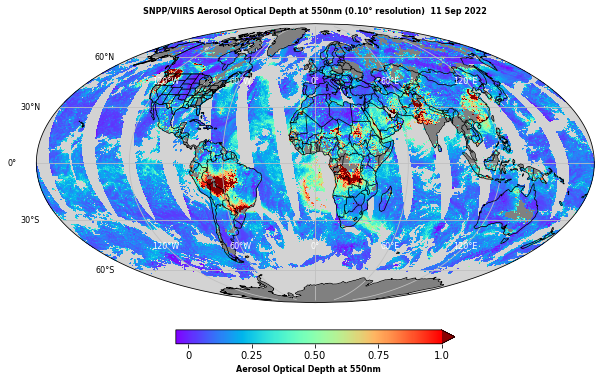

In [69]:
# Block 11e: Add automatically-generated plot title to global map of aerosol optical depth (AOD) at 550 nm

# Create plot title automatically using information from file name
# Extract satellite name and reformat
satellite = file_id.name.split('_')[2]
if satellite == 'npp':
    satellite_name = 'SNPP'
elif satellite == 'noaa20':
    satellite_name = 'NOAA-20'
# Extract data spatial resolution    
resolution = file_id.name.split('_')[4][:4]
# Use datetime module to extract obseration date & reformat
date = datetime.datetime.strptime(file_id.name.split('_')[6][:8], '%Y%m%d').date()
date = date.strftime('%d %b %Y')
# Put extracted/reformated strings together to make image title
image_title = satellite_name + '/VIIRS Aerosol Optical Depth at 550nm (' + resolution +  '\N{DEGREE SIGN} resolution)  ' + date

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# Set map projection
ax = plt.axes(projection=ccrs.Mollweide())

# Add simple coastlines & borders (1:110m coarse resolution)
# "zorder" argument sets order for plotting layers (larger zorder plots over smaller zorder); default zorder=1.5 
ax.add_feature(cfeature.COASTLINE, lw=0.75, zorder=3)
ax.add_feature(cfeature.BORDERS, lw=0.75, zorder=3)
ax.add_feature(cfeature.LAKES, color='lightgrey')
ax.add_feature(cfeature.STATES, lw=0.5, zorder=3)
ax.add_feature(cfeature.LAND, color='grey')
ax.add_feature(cfeature.OCEAN, color='lightgrey')

# Add customized latitude/longitude gridlines & labels using Cartopy
gl=ax.gridlines(draw_labels=True, lw=0.25, color='silver')
gl.xformatter=LongitudeFormatter()
gl.yformatter=LatitudeFormatter()
gl.right_labels=None
gl.rotate_labels=None
gl.ypadding=20
gl.xlabel_style={'size': 8, 'color': 'white'}
gl.ylabel_style={'size': 8}

# Set colormap with unique color for data > vmax
cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

# Create pseudo-color plot of AOD data
# The "transform=ccrs.PlateCarree()" argument tells Cartopy the AOD data are in geographic coordinates (lat/lon)
# The "zorder=2" argument plots AOD data under coastlines/borders & over land/ocean/lakes polygons
plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree(), zorder=2)

# Add colorbar
cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.05, shrink=0.5, ticks=[0, 0.25, 0.5, 0.75, 1], extend='max')
cb.set_label(label='Aerosol Optical Depth at 550nm', size=8, weight='bold')
cb.ax.set_xticklabels(['0', '0.25', '0.50', '0.75', '1.0'])

# Add plot title
plt.title(image_title, pad=10, ma='center', size=8, weight='bold')

# Show plot
plt.show()

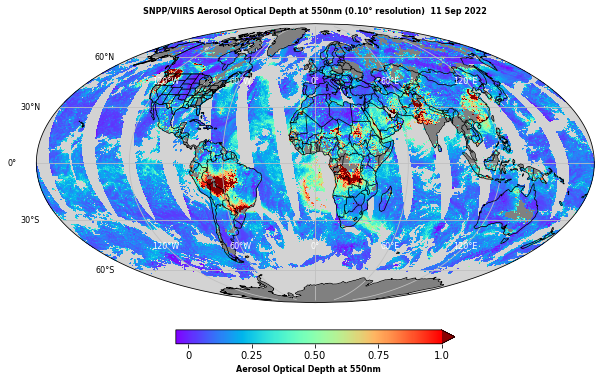

In [70]:
# Block 12a: Save global map of aerosol optical depth (AOD) at 550 nm
# Simplest possible saved image file (default settings) using manual saved file name

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# Set map projection
ax = plt.axes(projection=ccrs.Mollweide())

# Add simple coastlines & borders (1:110m coarse resolution)
# "zorder" argument sets order for plotting layers (larger zorder plots over smaller zorder); default zorder=1.5 
ax.add_feature(cfeature.COASTLINE, lw=0.75, zorder=3)
ax.add_feature(cfeature.BORDERS, lw=0.75, zorder=3)
ax.add_feature(cfeature.LAKES, color='lightgrey')
ax.add_feature(cfeature.STATES, lw=0.5, zorder=3)
ax.add_feature(cfeature.LAND, color='grey')
ax.add_feature(cfeature.OCEAN, color='lightgrey')

# Add customized latitude/longitude gridlines & labels using Cartopy
gl=ax.gridlines(draw_labels=True, lw=0.25, color='silver')
gl.xformatter=LongitudeFormatter()
gl.yformatter=LatitudeFormatter()
gl.right_labels=None
gl.rotate_labels=None
gl.ypadding=20
gl.xlabel_style={'size': 8, 'color': 'white'}
gl.ylabel_style={'size': 8}

# Set colormap with unique color for data > vmax
cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

# Create pseudo-color plot of AOD data
# The "transform=ccrs.PlateCarree()" argument tells Cartopy the AOD data are in geographic coordinates (lat/lon)
# The "zorder=2" argument plots AOD data under coastlines/borders & over land/ocean/lakes polygons
plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree(), zorder=2)

# Add colorbar
cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.05, shrink=0.5, ticks=[0, 0.25, 0.5, 0.75, 1], extend='max')
cb.set_label(label='Aerosol Optical Depth at 550nm', size=8, weight='bold')
cb.ax.set_xticklabels(['0', '0.25', '0.50', '0.75', '1.0'])

# Create plot title automatically using information from file name
# Extract satellite name and reformat
satellite = file_id.name.split('_')[2]
if satellite == 'npp':
    satellite_name = 'SNPP'
elif satellite == 'noaa20':
    satellite_name = 'NOAA-20'
# Extract data spatial resolution    
resolution = file_id.name.split('_')[4][:4]
# Use datetime module to extract obseration date & reformat
date = datetime.datetime.strptime(file_id.name.split('_')[6][:8], '%Y%m%d').date()
date = date.strftime('%d %b %Y')
# Put extracted/reformated strings together to make image title
image_title = satellite_name + '/VIIRS Aerosol Optical Depth at 550nm (' + resolution +  '\N{DEGREE SIGN} resolution)  ' + date
# Add plot title
plt.title(image_title, pad=10, ma='center', size=8, weight='bold')

# Show plot
plt.show()

# Save figure (default settings)
saved_file_name = 'aod_map_default'
fig.savefig(saved_file_name)
    
# Close plot
plt.close()

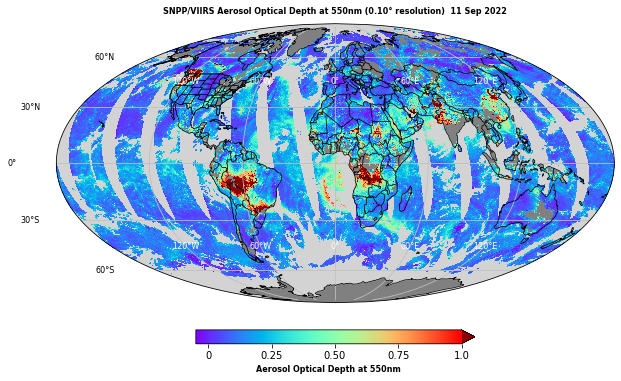

In [71]:
# Block 12b: Save global map of aerosol optical depth (AOD) at 550 nm
# Customized settings for saved image file using manual saved file name
# Matplotlib "savefig" settings: https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure.savefig

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# Set map projection
ax = plt.axes(projection=ccrs.Mollweide())

# Add simple coastlines & borders (1:110m coarse resolution)
# "zorder" argument sets order for plotting layers (larger zorder plots over smaller zorder); default zorder=1.5 
ax.add_feature(cfeature.COASTLINE, lw=0.75, zorder=3)
ax.add_feature(cfeature.BORDERS, lw=0.75, zorder=3)
ax.add_feature(cfeature.LAKES, color='lightgrey')
ax.add_feature(cfeature.STATES, lw=0.5, zorder=3)
ax.add_feature(cfeature.LAND, color='grey')
ax.add_feature(cfeature.OCEAN, color='lightgrey')

# Add customized latitude/longitude gridlines & labels using Cartopy
gl=ax.gridlines(draw_labels=True, lw=0.25, color='silver')
gl.xformatter=LongitudeFormatter()
gl.yformatter=LatitudeFormatter()
gl.right_labels=None
gl.rotate_labels=None
gl.ypadding=40
gl.xlabel_style={'size': 8, 'color': 'white'}
gl.ylabel_style={'size': 8}

# Set colormap with unique color for data > vmax
cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

# Create pseudo-color plot of AOD data
# The "transform=ccrs.PlateCarree()" argument tells Cartopy the AOD data are in geographic coordinates (lat/lon)
# The "zorder=2" argument plots AOD data under coastlines/borders & over land/ocean/lakes polygons
plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree(), zorder=2)

# Add colorbar
cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.05, shrink=0.5, ticks=[0, 0.25, 0.5, 0.75, 1], extend='max')
cb.set_label(label='Aerosol Optical Depth at 550nm', size=8, weight='bold')
cb.ax.set_xticklabels(['0', '0.25', '0.50', '0.75', '1.0'])

# Create plot title automatically using information from file name
# Extract satellite name and reformat
satellite = file_id.name.split('_')[2]
if satellite == 'npp':
    satellite_name = 'SNPP'
elif satellite == 'noaa20':
    satellite_name = 'NOAA-20'
# Extract data spatial resolution    
resolution = file_id.name.split('_')[4][:4]
# Use datetime module to extract obseration date & reformat
date = datetime.datetime.strptime(file_id.name.split('_')[6][:8], '%Y%m%d').date()
date = date.strftime('%d %b %Y')
# Put extracted/reformated strings together to make image title
image_title = satellite_name + '/VIIRS Aerosol Optical Depth at 550nm (' + resolution +  '\N{DEGREE SIGN} resolution)  ' + date
# Add plot title
plt.title(image_title, pad=10, ma='center', size=8, weight='bold')

# Show plot
plt.show()

# Save figure
# "dpi" is image resolution in dots per inch
# "bbox_inches=tight" sets a "tight" bounding box around saved image
saved_file_name = 'aod_map_dpi300'
fig.savefig(saved_file_name, dpi=300, bbox_inches='tight')
    
# Close plot
plt.close()

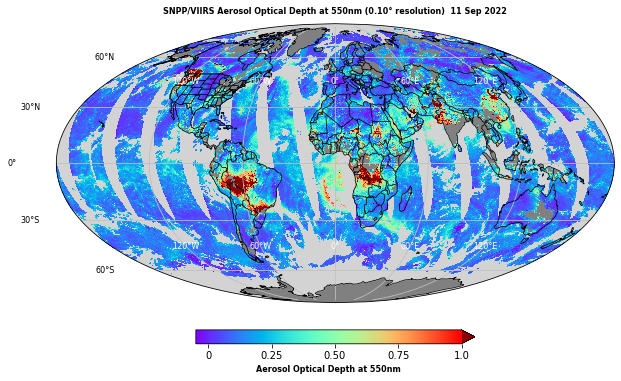

In [72]:
# Block 12c: Save global map of aerosol optical depth (AOD) at 550 nm
# Customized settings for saved image file using automatically generated saved file name

# Set up figure in Matplotlib
fig = plt.figure(figsize=(10, 10))

# Set map projection
ax = plt.axes(projection=ccrs.Mollweide())

# Add simple coastlines & borders (1:110m coarse resolution)
# "zorder" argument sets order for plotting layers (larger zorder plots over smaller zorder); default zorder=1.5 
ax.add_feature(cfeature.COASTLINE, lw=0.75, zorder=3)
ax.add_feature(cfeature.BORDERS, lw=0.75, zorder=3)
ax.add_feature(cfeature.LAKES, color='lightgrey')
ax.add_feature(cfeature.STATES, lw=0.5, zorder=3)
ax.add_feature(cfeature.LAND, color='grey')
ax.add_feature(cfeature.OCEAN, color='lightgrey')

# Add customized latitude/longitude gridlines & labels using Cartopy
gl=ax.gridlines(draw_labels=True, lw=0.25, color='silver')
gl.xformatter=LongitudeFormatter()
gl.yformatter=LatitudeFormatter()
gl.right_labels=None
gl.rotate_labels=None
gl.ypadding=40
gl.xlabel_style={'size': 8, 'color': 'white'}
gl.ylabel_style={'size': 8}

# Set colormap with unique color for data > vmax
cmap = plt.get_cmap('rainbow').with_extremes(over='darkred')

# Create pseudo-color plot of AOD data
# The "transform=ccrs.PlateCarree()" argument tells Cartopy the AOD data are in geographic coordinates (lat/lon)
# The "zorder=2" argument plots AOD data under coastlines/borders & over land/ocean/lakes polygons
plot = ax.pcolormesh(ds.lon, ds.lat, ds.AOD550, cmap=cmap, vmin=-0.05, vmax=1, transform=ccrs.PlateCarree(), zorder=2)

# Add colorbar
cb = fig.colorbar(plot, orientation='horizontal', fraction=0.2, pad=0.05, shrink=0.5, ticks=[0, 0.25, 0.5, 0.75, 1], extend='max')
cb.set_label(label='Aerosol Optical Depth at 550nm', size=8, weight='bold')
cb.ax.set_xticklabels(['0', '0.25', '0.50', '0.75', '1.0'])

# Create plot title automatically using information from file name
# Extract satellite name and reformat
satellite = file_id.name.split('_')[2]
if satellite == 'npp':
    satellite_name = 'SNPP'
elif satellite == 'noaa20':
    satellite_name = 'NOAA-20'
# Extract data spatial resolution    
resolution = file_id.name.split('_')[4][:4]
# Use datetime module to extract obseration date & reformat
date = datetime.datetime.strptime(file_id.name.split('_')[6][:8], '%Y%m%d').date()
date = date.strftime('%d %b %Y')
# Put extracted/reformated strings together to make image title
image_title = satellite_name + '/VIIRS Aerosol Optical Depth at 550nm (' + resolution +  '\N{DEGREE SIGN} resolution)  ' + date
# Add plot title
plt.title(image_title, pad=10, ma='center', size=8, weight='bold')

# Show plot
plt.show()

# Save figure
# "dpi" is image resolution in dots per inch
# "bbox_inches=tight" sets a "tight" bounding box around saved image
saved_file_format = '.png'  # Saved file format (string): .eps, .jpeg, .jpg, .pdf, .pgf, .png, .ps, .raw, .rgba, .svg, .svgz, .tif, .tiff
saved_file_name = satellite + '_viirs_aod550_' + resolution + '-deg_' + file_id.name.split('_')[6][:8] + saved_file_format
fig.savefig(saved_file_name, dpi=300, bbox_inches='tight')
    
# Close plot
plt.close()